In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%run 1_cleaning_data.ipynb
data = data
from statsmodels.tsa.arima.model import ARIMA

In [4]:
#for performing the forecasting we have to set order date as index
data.set_index('Order Date', inplace=True)

In [15]:
monthly_sales = data.resample('ME')['Total_Sales'].sum()

In [17]:
#applying arima
model = ARIMA(monthly_sales,order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

c:\Users\Hemanth\anaconda3\envs\python1st\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total_Sales   No. Observations:                   13
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -190.888
Date:                Sun, 27 Oct 2024   AIC                            393.776
Time:                        23:48:13   BIC                            396.685
Sample:                    01-31-2019   HQIC                           392.699
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9488      0.217     -4.371      0.000      -1.374      -0.523
ar.L2          0.1534      0.393      0.390      0.697      -0.618       0.924
ar.L3         -0.6722      0.167     -4.029      0.000      -0.999      -0.345
ar.L4         -0.9906      0.198     -5.010      0.000      -1.378      -0.603
ar.L5         -0.2161      0.235     -0.918      0.358      -0.677       0.245
sigma2      3.702e+11   9.19e-13   4.03e+23      0.000     3.7e+11     3.7e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.83
Prob(Q):                              0.97   Prob(JB):                         0.15
Heteroskedasticity (H):               1.41   Skew:                            -1.24
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.38e+39. Standard errors may be unstable.
"""

In [19]:
#forecasting the next 12 month
forecast = model_fit.get_forecast(steps = 12)
forecast_index = pd.date_range(
    start=monthly_sales.index[-1],periods=12, freq= 'ME')
forecast_series = forecast.predicted_mean

In [21]:
print(forecast)
print('******************************')
print(forecast_index)
print('******************************')
print(forecast_series)

******************************
DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='ME')
******************************
2020-02-29    3.356734e+06
2020-03-31   -1.295991e+06
2020-04-30    5.442691e+06
2020-05-31    3.365407e+05
2020-06-30    7.019681e+06
2020-07-31   -7.486517e+05
2020-08-31    5.409355e+06
2020-09-30   -2.515259e+06
2020-10-31    5.653039e+06
2020-11-30   -1.200733e+06
2020-12-31    7.460434e+06
2021-01-31   -7.797764e+05
Freq: ME, Name: predicted_mean, dtype: float64


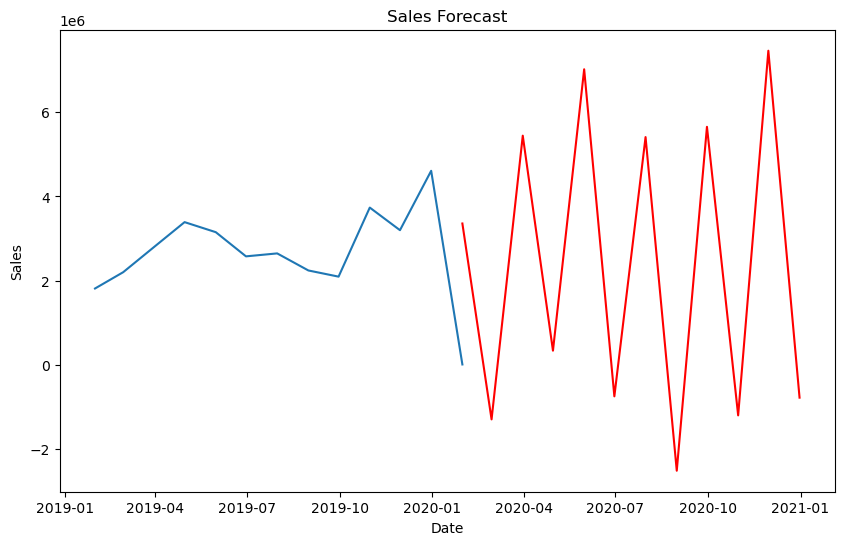

In [23]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales, label='privious sales')
plt.plot(forecast_index,forecast_series,color = 'red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()